In [12]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns= wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
df= pd.concat([df_data,df_target], axis=1)

In [13]:
X=df.drop('kind',axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
y=df['kind']
y.value_counts()

1    71
0    59
2    48
Name: kind, dtype: int64

In [15]:

# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>,
        <AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>],
       [<AxesSubplot:title={'center':'nonflavanoid_phenols'}>,
        <AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>,
        <AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'kind'}>]], dtype=object)

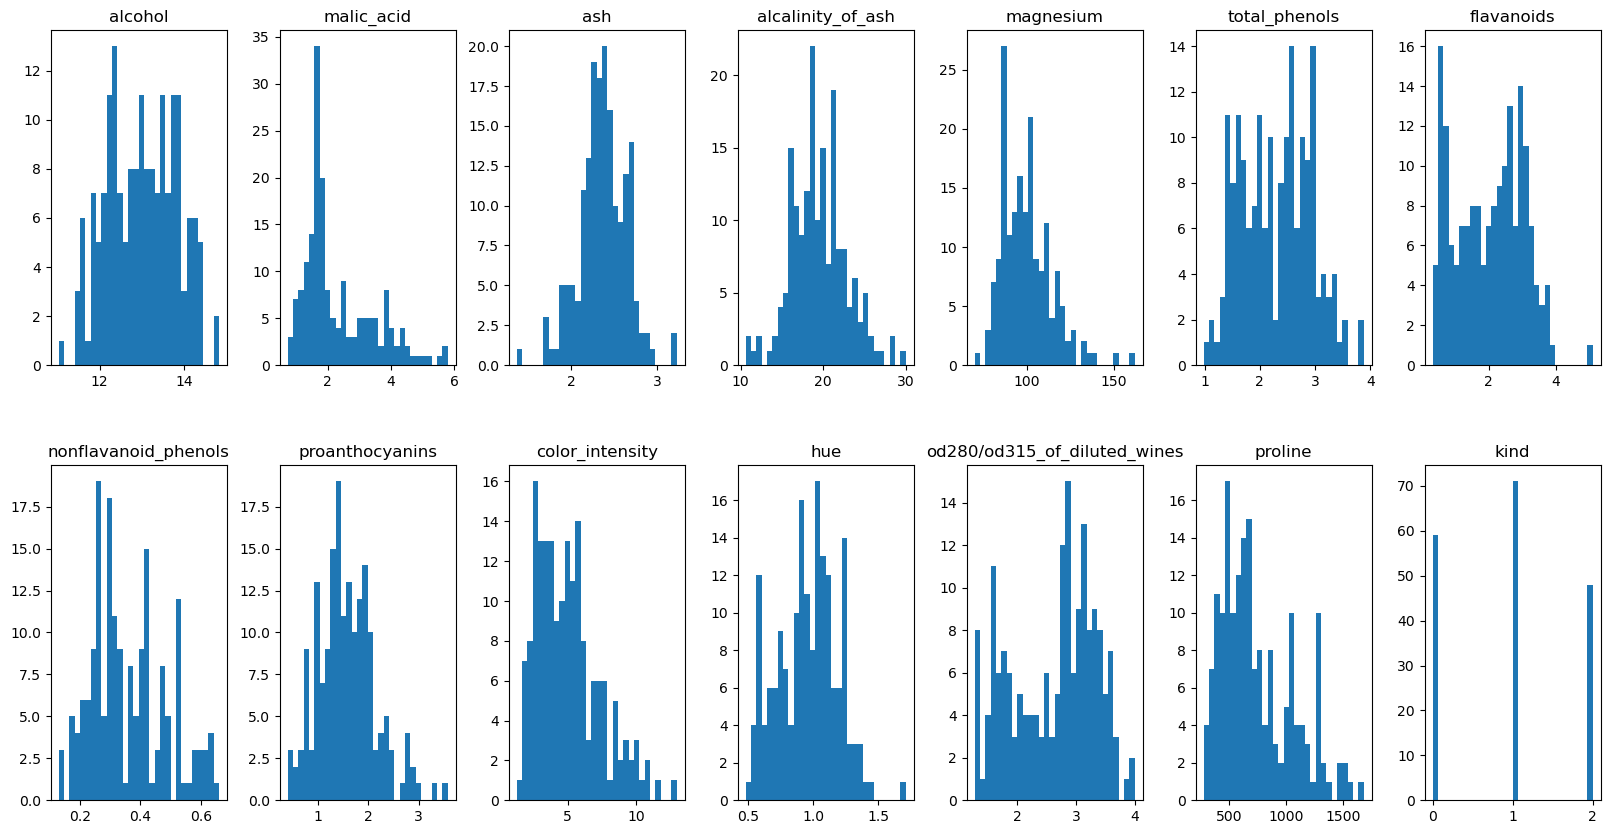

In [17]:
df.hist(figsize=(20,10), grid=False, layout=(2, 7), bins = 30)

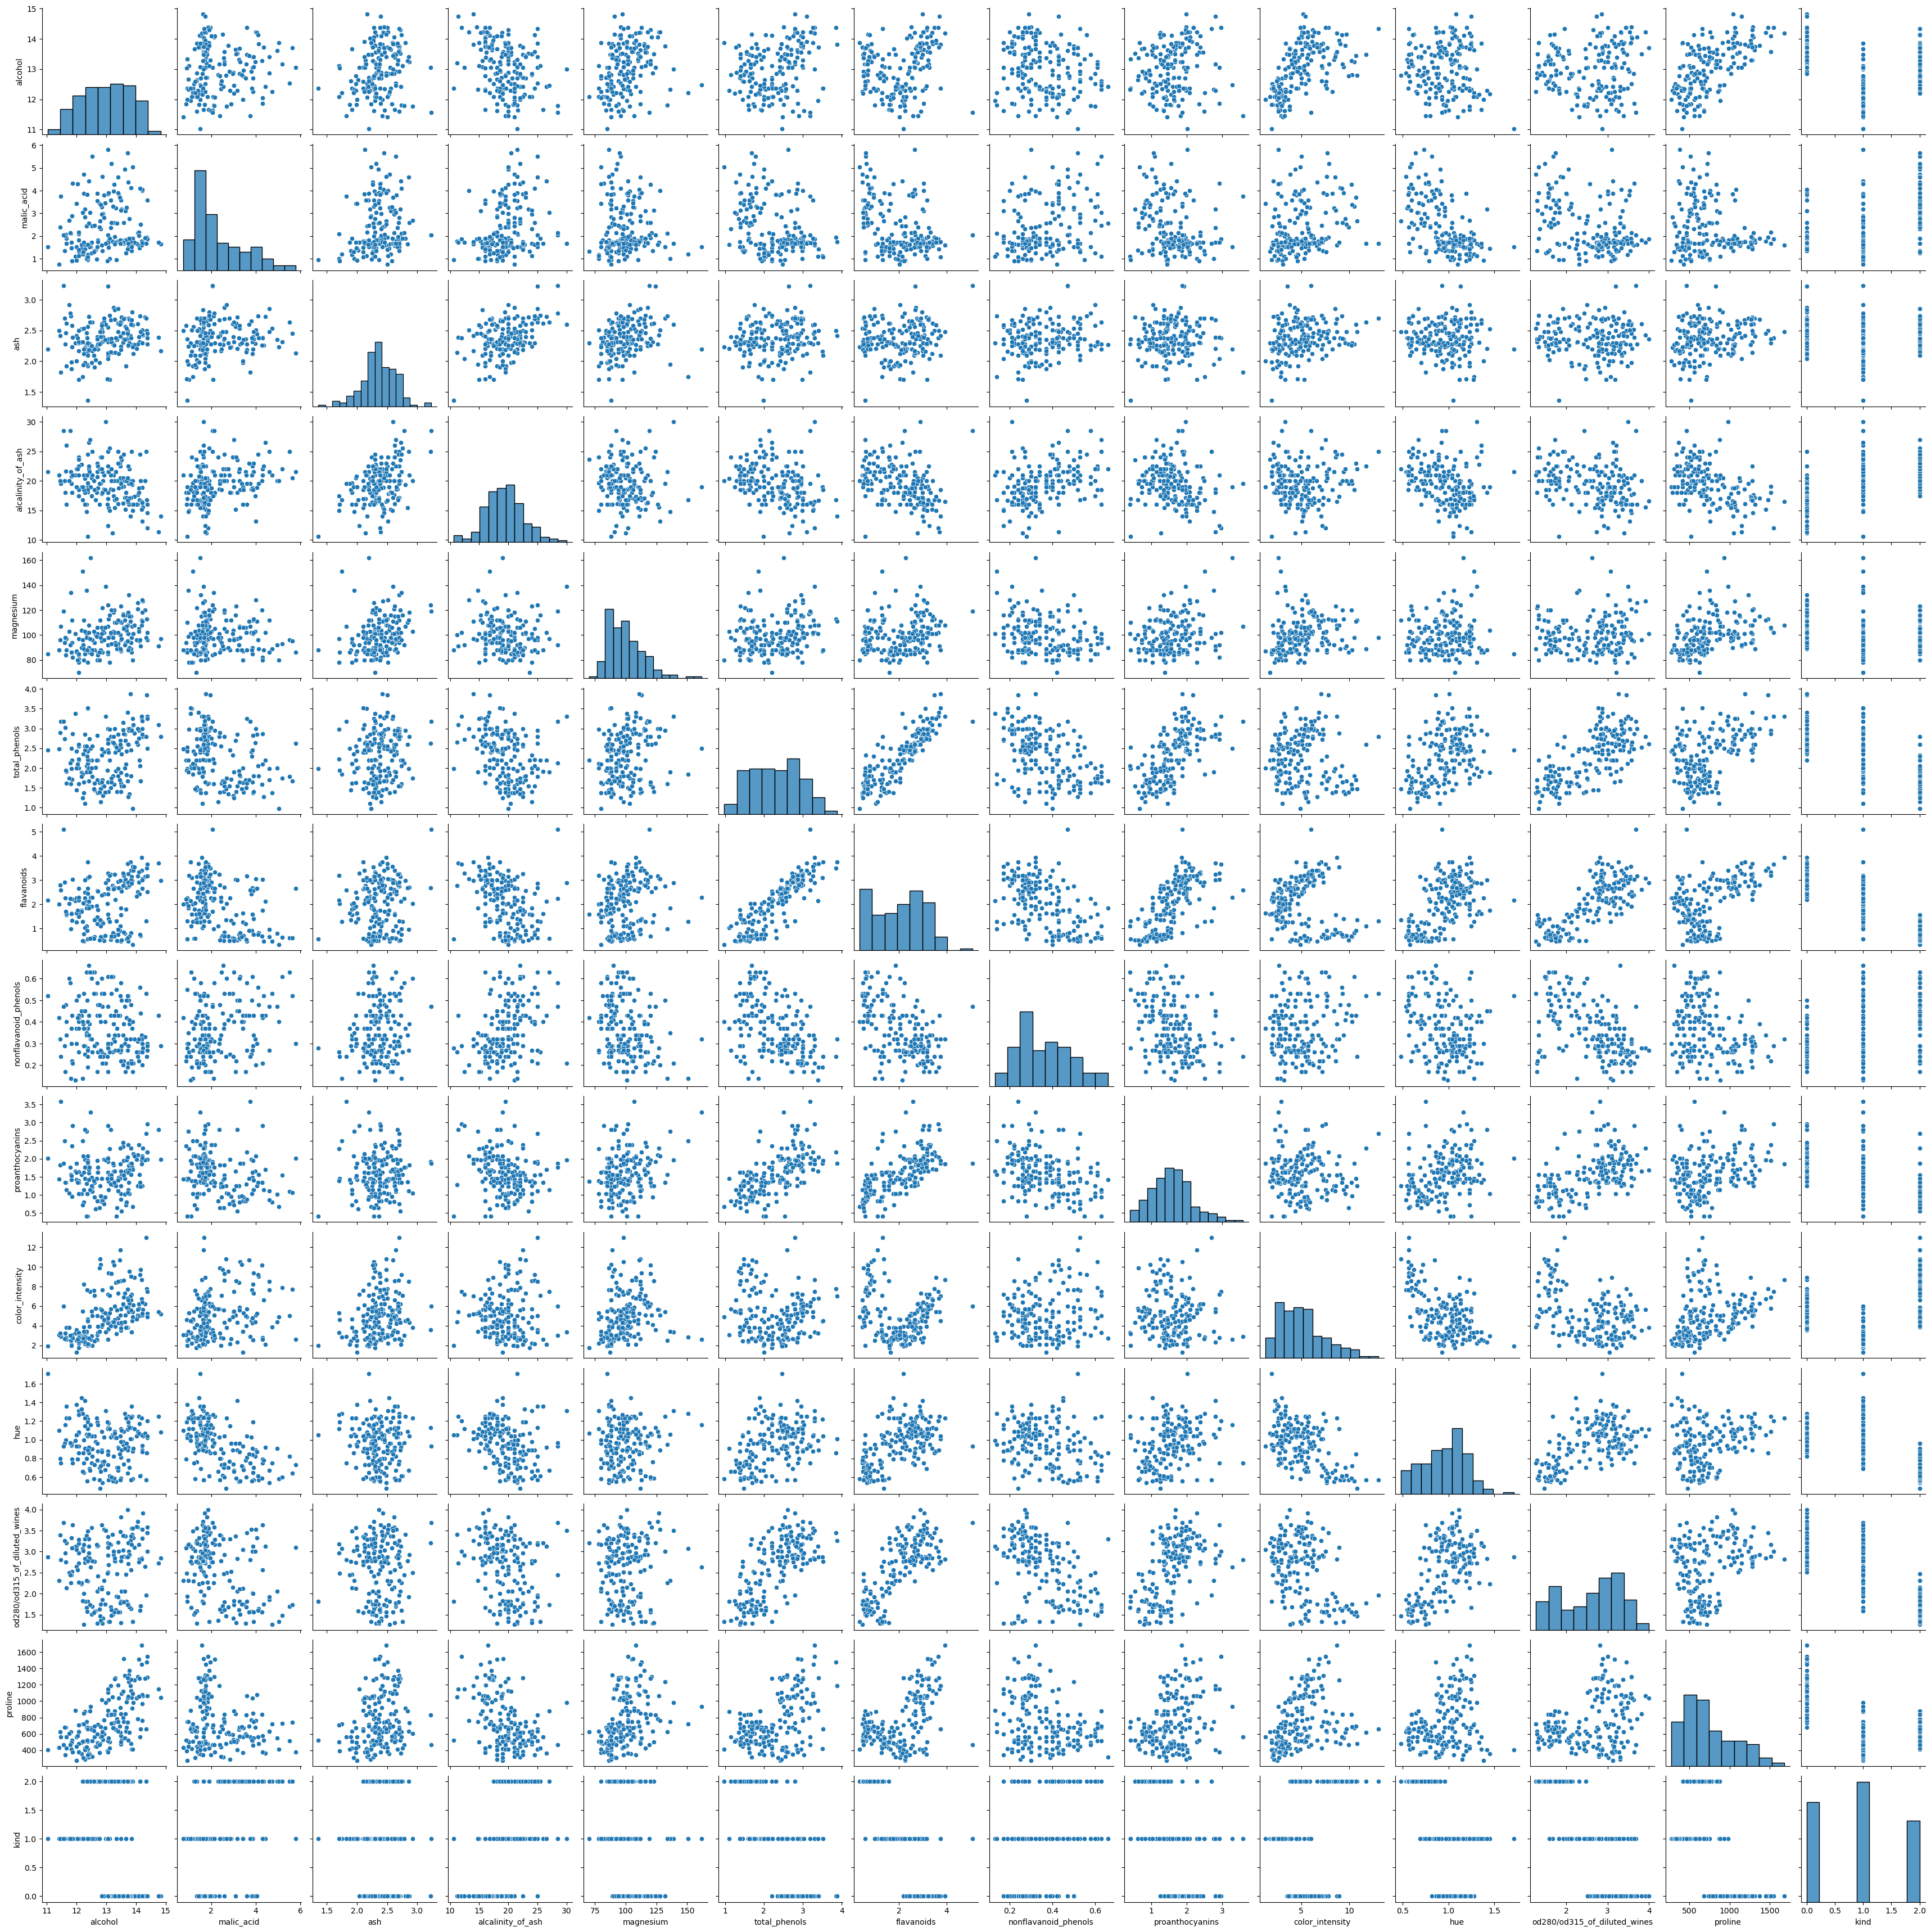

In [18]:
import numpy as np
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

<AxesSubplot:xlabel='kind', ylabel='count'>

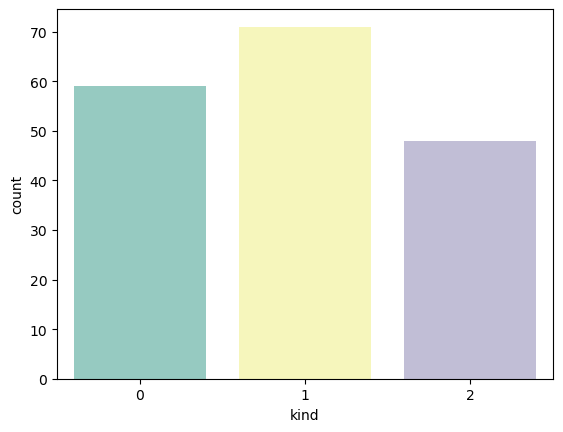

In [19]:
import seaborn as sns
sns.countplot(x = 'kind', data = df, palette="Set3")

In [20]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

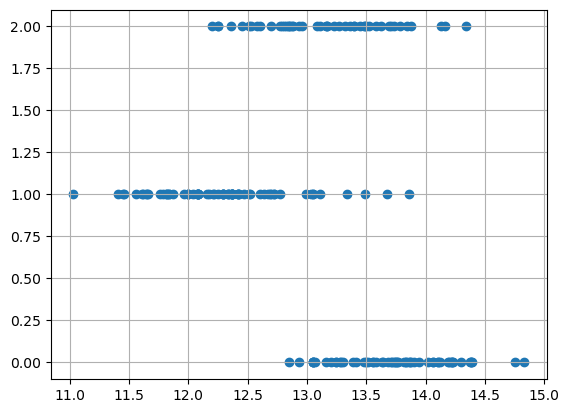

In [22]:
var = 'alcohol'
plt.scatter(x = df[var], y = df['kind'],)
plt.grid(True)

In [26]:
df.drop(df[(df['alcohol']> 11.3) & (df['kind'] < 3)].index, inplace=True)
df.drop(df[(df['alcohol']<14.5) & (df['kind'] >= 0)].index, inplace=True)

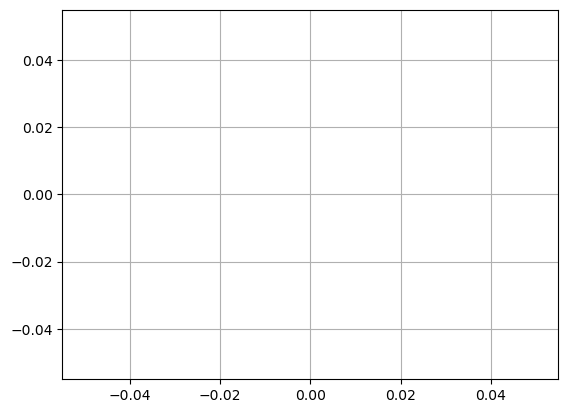

In [27]:
var = 'alcohol'
plt.scatter(x = df[var], y = df['kind'],)
plt.grid(True)